In [2]:
import seaborn as sns

In [3]:
# Read the data -- from https://github.com/dbrizan/cs686-2018-01/blob/master/diabetes.csv
import pandas as pd

df = pd.read_csv('diabetes.csv')
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

In [4]:
X.head()

,Pregnancies,Glucose,DiastolicBloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.0,148,72,35,0,33.6,0.627,50
1,1.0,85,66,29,0,26.6,0.351,31
2,8.0,183,64,0,0,23.3,0.672,32
3,1.0,89,66,23,94,28.1,0.167,21
4,0.0,137,40,35,168,43.1,2.288,33


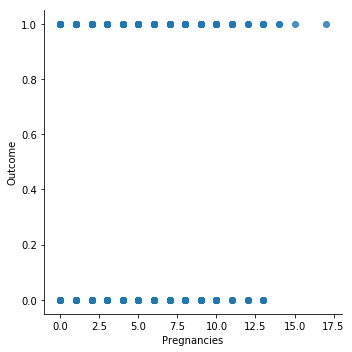

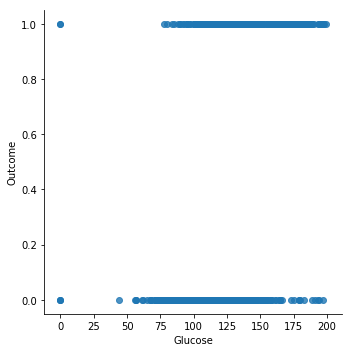

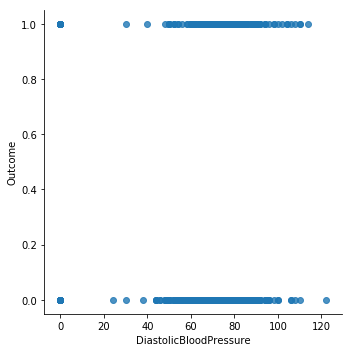

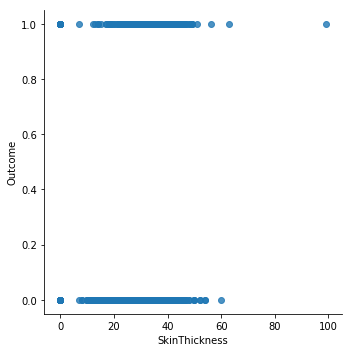

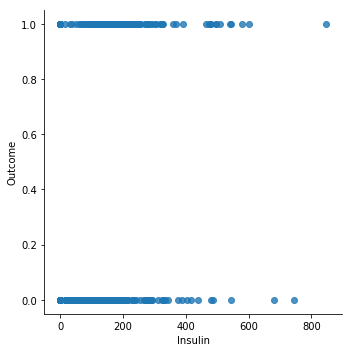

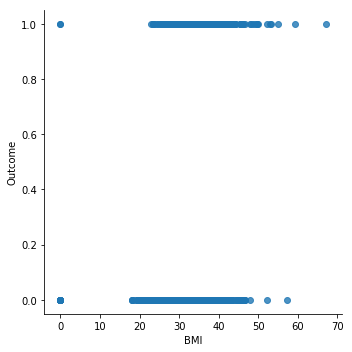

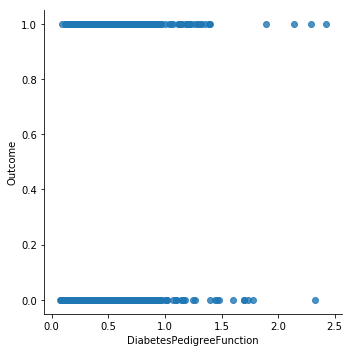

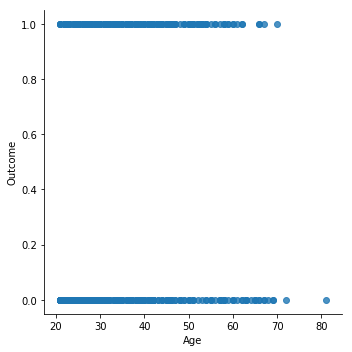

In [5]:
for name in X.columns:
    sns.lmplot(x=name,y="Outcome",data=df,fit_reg=False)

In [6]:
# Split into train & test sets. To keep these stable, set the seed and test size.
from sklearn.model_selection import train_test_split

seed = 7
test_size = 0.2
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size=test_size, random_state=seed)

In [7]:
# X[0] is missing some values, indicated with "NaN". We need values for ALL rows in our model.
# Impute missing values with sklearn's Imputer.
from sklearn.preprocessing import Imputer

imputer = Imputer(missing_values='NaN', strategy='most_frequent', axis=0)
train_x_imputed = imputer.fit_transform(train_x)
test_x_imputed = imputer.fit_transform(test_x)

In [8]:
# Now, classify and determine accuracy.... first with RF.
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier()
clf.fit(train_x_imputed, train_y)
hyp = clf.predict(test_x_imputed)
print('Accuracy: %0.4f' % (accuracy_score(test_y, hyp)))

Accuracy: 0.7727


In [9]:
# Next, classify and determine accuracy with XGBoost, a boosting-based classifier.
# Download & install (on Anaconda for Linux/Mac) with: conda install -c conda-forge xgboost 
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(train_x_imputed, train_y)
hyp = clf.predict(test_x_imputed)
print('Accuracy: %0.4f' % (accuracy_score(test_y, hyp)))

Accuracy: 0.7987


/Users/yliu/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
